# Perkenalan

Nama: Made Ary Widanthi <br>
Batch: FTDS 020 RMT<br>
Objective: Buatlah model clustering untuk melakukan Customer Segmentation dari data kartu kredit sebuah bank dibawah ini. Data ini merupakan data informasi penggunaan kartu kredit selama 6 bulan terakhir.

SQL Query <br>

```
SELECT *
FROM ftds-hacktiv8-project.phase1_ftds_020_rmt.credit-card-information
WHERE MOD(CUST_ID, 2) = 0;
```

# Import Library

In [559]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
! pip install feature-engine
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import pickle
import json
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
import joblib

In [560]:
! pip install yellowbrick

# Data Loading

In [561]:
data = pd.read_csv('h8dsft_P1G4_AryWidanthi.csv')

In [562]:
data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875000,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125000,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8
5,4266,2237.238086,1.000000,120.0,120.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2500.0,343.102984,712.986387,0.0,8
6,4360,2730.843802,1.000000,2900.0,2900.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2900.0,0.000000,NaN,0.0,8
7,4680,424.994385,0.375000,1200.0,1200.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1200.0,57.266292,56.720210,0.0,8
8,5884,18.885677,0.375000,57.0,57.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
9,24,0.004816,0.545455,51.7,0.0,51.7,0.0,0.250,0.000,0.250,0.0,0,3,3000.0,33.249088,0.059481,0.0,12


In [563]:
data.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,1588,538.768762,0.909091,226.95,129.58,97.37,452.009130,0.545455,0.090909,0.454545,0.272727,8,9,1200.0,946.649324,211.220001,0.000000,11
4466,6900,7468.012010,1.000000,1569.41,796.07,773.34,4500.288676,0.545455,0.454545,0.363636,0.272727,7,10,8700.0,2162.943350,4628.802111,0.000000,11
4467,2528,427.642111,0.888889,0.00,0.00,0.00,2563.705644,0.000000,0.000000,0.000000,0.888889,62,0,1200.0,2853.967334,146.976542,0.500000,9
4468,1226,706.327578,0.888889,169.54,169.54,0.00,1406.735573,0.333333,0.333333,0.000000,0.888889,14,3,2500.0,302.976780,142.597254,0.000000,9
4469,2152,1420.727073,1.000000,0.00,0.00,0.00,311.804499,0.000000,0.000000,0.000000,0.900000,9,0,1500.0,506.765033,449.179818,0.000000,10
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11
4474,3564,1977.007090,1.000000,1032.04,226.90,805.14,4335.919227,0.909091,0.090909,0.818182,0.545455,21,17,4000.0,3056.424974,910.707525,0.090909,11


In [564]:
data.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4474.000000,4475.000000,4317.000000,4475.000000,4475.000000
mean,4476.000000,1565.743939,0.877608,1003.158324,588.504849,415.025075,973.453671,0.490122,0.202614,0.364989,0.134156,3.196425,14.490503,4494.020175,1726.212274,854.429538,0.157206,11.516425
std,2583.931114,2091.205727,0.235604,2210.812899,1666.500287,927.360842,2133.464502,0.399874,0.298502,0.397336,0.199221,6.500169,24.156038,3668.535689,2961.258570,2306.411178,0.295869,1.347819
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.037744,0.000000,6.000000
25%,2239.000000,132.536353,0.888889,40.065000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,390.206371,169.814310,0.000000,12.000000
50%,4476.000000,874.905296,1.000000,362.480000,29.990000,89.450000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,831.048408,309.854995,0.000000,12.000000
75%,6713.000000,2058.519163,1.000000,1122.640000,580.320000,484.255000,1098.569962,0.916667,0.333333,0.750000,0.181818,4.000000,17.000000,6000.000000,1895.959003,830.395060,0.166667,12.000000
max,8950.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,29282.109150,1.000000,1.000000,1.000000,1.166667,110.000000,358.000000,30000.000000,46930.598240,61031.618600,1.000000,12.000000


In [565]:
data_duplicate = data.copy()

In [566]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

Data Detail:
1. CUST_ID: Credit card holder ID
2. BALANCE: Monthly average balance (based on daily balance averages)
3. BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES: Total purchase amount spent during last 12 months
5. ONEOFF_PURCHASES: Total amount of one-off purchases
6. INSTALLMENTS_PURCHASES: Total amount of installment purchases
7. CASH_ADVANCE: Total cash-advance amount
8. PURCHASES_ FREQUENCY: Frequency of purchases (Percent of months with at least one purchase)
9. ONEOFF_PURCHASES_FREQUENCY: Frequency of one-off-purchases
10. PURCHASES_INSTALLMENTS_FREQUENCY: Frequency of installment purchases
11. CASH_ADVANCE_ FREQUENCY: Cash-Advance frequency
12. AVERAGE_PURCHASE_TRX: Average amount per purchase transaction
13. CASH_ADVANCE_TRX: Average amount per cash-advance transaction
14. PURCHASES_TRX: Average amount per purchase transaction
15. CREDIT_LIMIT: Credit limit
16. PAYMENTS: Total payments (due amount paid by the customer to decrease their statement balance) in the period
17. MINIMUM_PAYMENTS: Total minimum payments due in the period.
18. PRC_FULL_PAYMEN: Percentage of months with full payment of the due statement balance
19. TENURE: Number of months as a customer <br>
Source: https://www.kaggle.com/datasets/parnianmalekian/customer-dataset

In [567]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Terdapat 18 kolom dan semua datatype adalah numerikal data pada dataset. Pada kolom minimum_payments terdapat missing value.

# EDA (Exploratory Data Analysis)

In [568]:
for column in data_duplicate:
  print(column, ":", data[column].unique(), "\n")

CUST_ID : [ 788 1902 2322 ... 4296 4476 3564] 

BALANCE : [1.65815350e+01 9.43584041e+02 1.97991600e+00 ... 3.38649088e+03
 4.84054557e+03 1.97700709e+03] 

BALANCE_FREQUENCY : [0.125    0.875    1.       0.375    0.545455 0.454545 0.363636 0.181818
 0.909091 0.       0.272727 0.090909 0.727273 0.818182 0.25     0.636364
 0.75     0.625    0.6      0.5      0.833333 0.444444 0.666667 0.8
 0.571429 0.857143 0.777778 0.7      0.333333 0.888889 0.166667 0.714286
 0.2      0.3      0.1      0.9      0.4      0.111111 0.222222 0.285714
 0.142857 0.555556] 

PURCHASES : [ 200.    103.     80.   ...  560.98 1595.93 1032.04] 

ONEOFF_PURCHASES : [   0.    103.     80.   ...  427.22 1595.93  226.9 ] 

INSTALLMENTS_PURCHASES : [200.     0.    51.7  ... 773.34 133.76 805.14] 

CASH_ADVANCE : [   0.       1103.30382   455.227731 ... 2008.153534 4359.32575
 4335.919227] 

PURCHASES_FREQUENCY : [0.125    0.25     0.375    0.5      0.625    0.75     0.875    1.
 0.090909 0.181818 0.363636 0.142857 0.

Data yang dapat dikonsiderasi sebagai kategori adalah tenure

In [569]:
data.drop('CUST_ID', axis=1, inplace=True)

Menghapus data Cust ID karena merupakan data unique di setiap barisnya

12    3807
11     166
10     114
6      103
7      100
8       97
9       88
Name: TENURE, dtype: int64


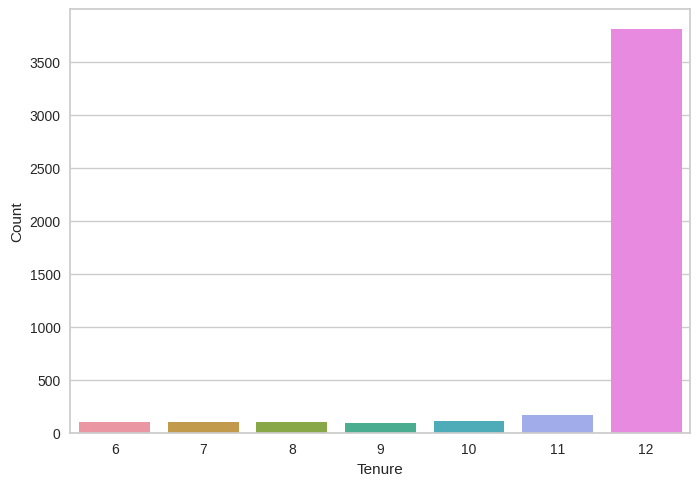

In [570]:
print(data_duplicate['TENURE'].value_counts())
tenure = data_duplicate['TENURE'].value_counts().reset_index(name='count')
ax = sns.barplot(x='index', y='count', data=tenure)
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

Tenure adalah lamanya client menggunakan kartu kredit, mayoritas client yang ada pada data sudah menjadi client selama 12 bulan atau setahun

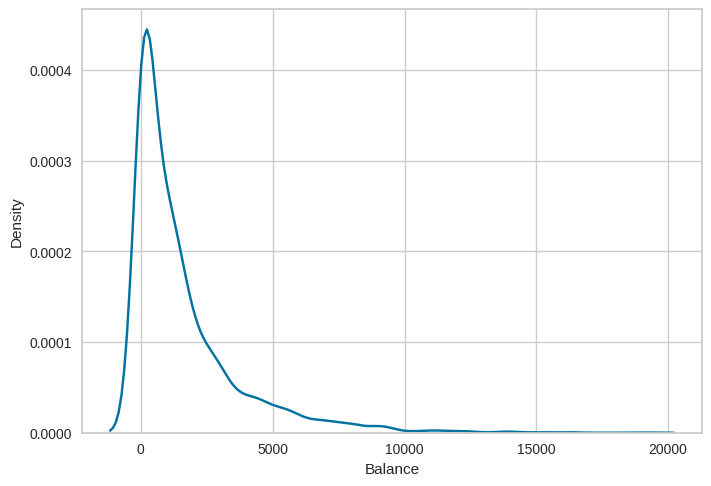

In [571]:
sns.kdeplot(data=data_duplicate, x='BALANCE')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.show()

Density Plot memperlihatkan seberapa sering nilai-nilai data muncul dalam rentang tertentu dan membantu memvisualisasikan pola distribusi data. Saldo rata-rata bulanan (berdasarkan rata-rata saldo harian) client mayoritas berjumlah < 5000.

Rata-rata purchase: 1003.1583240223464


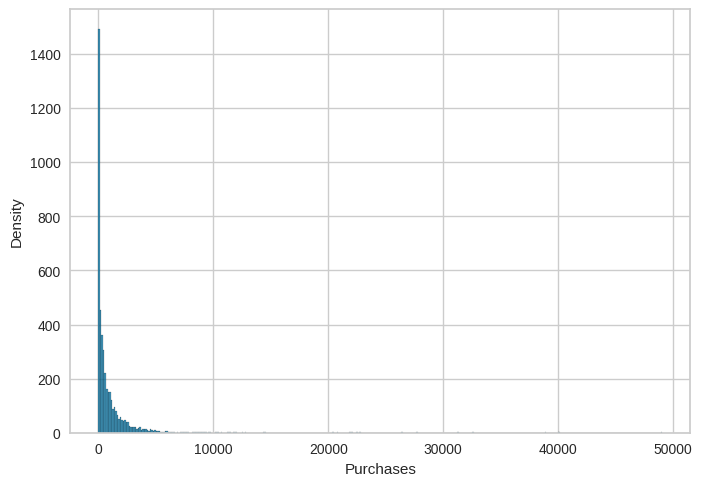

In [572]:
print("Rata-rata purchase:",data['PURCHASES'].mean())
sns.histplot(data=data_duplicate, x='PURCHASES')
plt.xlabel('Purchases')
plt.ylabel('Density')
plt.show()

Rata-rata pengeluaran yang dilakukan oleh client adalah 1003.15

Modus dari credit limit: 0    3000.0
Name: CREDIT_LIMIT, dtype: float64


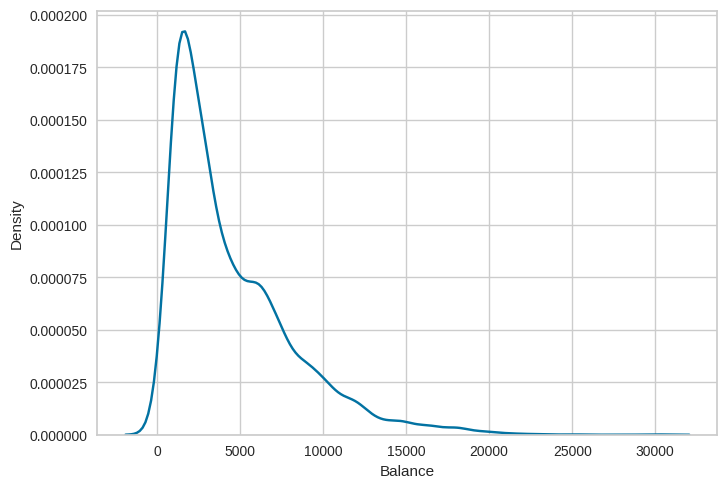

In [573]:
print("Modus dari credit limit:", data['CREDIT_LIMIT'].mode())
sns.kdeplot(data=data_duplicate, x='CREDIT_LIMIT')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.show()

Mayoritas pengguna nasabah menggunakan kartu kredit dengan limit 3000

In [574]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [575]:
def graph(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')
    plt.show()

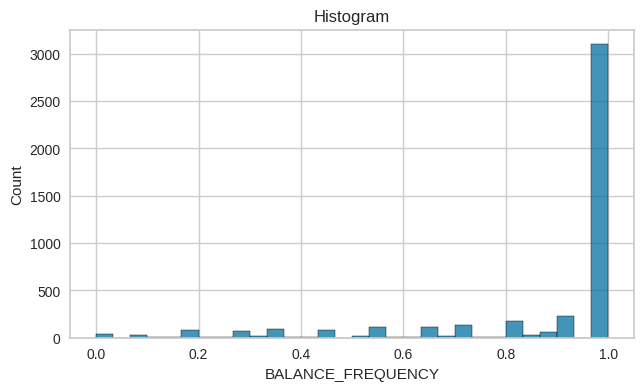

BALANCE_FREQUENCY : None


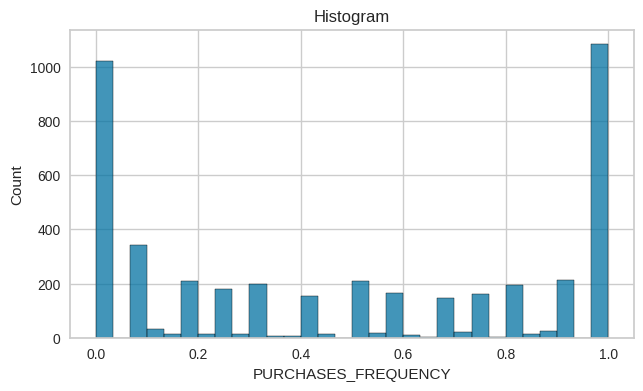

PURCHASES_FREQUENCY : None


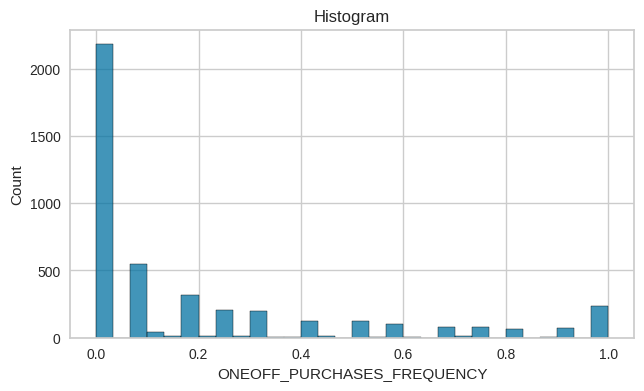

ONEOFF_PURCHASES_FREQUENCY : None


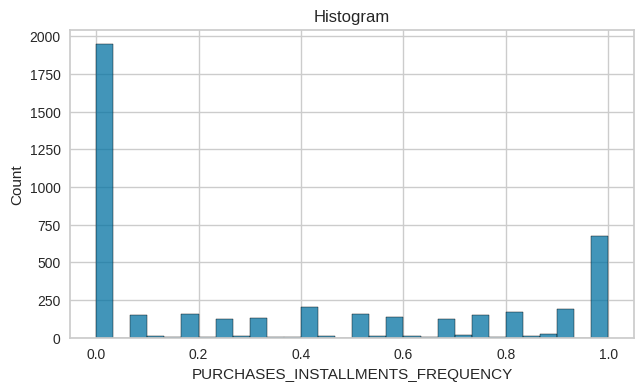

PURCHASES_INSTALLMENTS_FREQUENCY : None


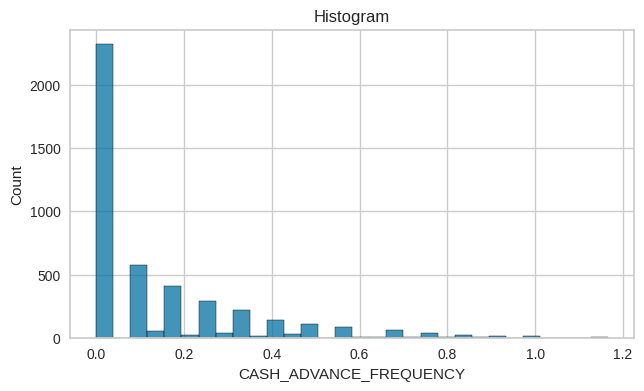

CASH_ADVANCE_FREQUENCY : None


In [576]:
for column in data[['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY' ]]:
  print(column, ":", graph(data,column))


Insight: <br>
- Balance frequency mayoritas 1 yang artinya client sering untuk mengupdate saldo mereka
- Purchase frequency mayoritas 0 dan 1 yang artinya jumlah client yang tidak sering melakukan purchase hampir sama banyak nya dengan jumlah client yang sering melakukan purchase.
- onoff purchase frequency mayoritas 0, yang artinya  purchase installments mayoritas 0, cash advance frequency mayoritas 0

# Feature Engineering

## Handle Missing Value

In [577]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terdapat 2 feature missing value yaitu CREDIT_LIMIT dan MINIMUM_PAYMENTS

In [578]:
data_duplicate.corr().style.background_gradient(cmap="vlag").set_precision(2)


<ipython-input-578-068cb76a6424>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data_duplicate.corr().style.background_gradient(cmap="vlag").set_precision(2)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,1.00,-0.02,0.00,-0.03,-0.02,-0.02,-0.01,0.01,0.01,-0.00,-0.01,-0.02,-0.01,-0.01,-0.02,-0.02,0.02,0.03
BALANCE,-0.02,1.00,0.32,0.18,0.16,0.13,0.47,-0.08,0.08,-0.07,0.43,0.39,0.15,0.54,0.33,0.41,-0.32,0.07
BALANCE_FREQUENCY,0.00,0.32,1.00,0.13,0.11,0.12,0.09,0.23,0.20,0.18,0.19,0.15,0.19,0.10,0.07,0.14,-0.12,0.12
PURCHASES,-0.03,0.18,0.13,1.00,0.92,0.72,-0.05,0.38,0.49,0.31,-0.12,-0.07,0.68,0.35,0.59,0.07,0.18,0.09
ONEOFF_PURCHASES,-0.02,0.16,0.11,0.92,1.00,0.40,-0.02,0.26,0.53,0.13,-0.08,-0.04,0.57,0.32,0.57,0.03,0.14,0.06
INSTALLMENTS_PURCHASES,-0.02,0.13,0.12,0.72,0.40,1.00,-0.09,0.44,0.23,0.50,-0.15,-0.09,0.62,0.28,0.40,0.10,0.19,0.10
CASH_ADVANCE,-0.01,0.47,0.09,-0.05,-0.02,-0.09,1.00,-0.22,-0.09,-0.19,0.60,0.63,-0.11,0.30,0.49,0.14,-0.14,-0.07
PURCHASES_FREQUENCY,0.01,-0.08,0.23,0.38,0.26,0.44,-0.22,1.00,0.50,0.86,-0.32,-0.22,0.58,0.13,0.10,-0.01,0.29,0.07
ONEOFF_PURCHASES_FREQUENCY,0.01,0.08,0.20,0.49,0.53,0.23,-0.09,0.50,1.00,0.15,-0.12,-0.09,0.56,0.32,0.23,-0.02,0.14,0.07
PURCHASES_INSTALLMENTS_FREQUENCY,-0.00,-0.07,0.18,0.31,0.13,0.50,-0.19,0.86,0.15,1.00,-0.28,-0.19,0.54,0.07,0.08,0.01,0.24,0.09


Semua fitur yang memiliki missing value korelasi tinggi dengan fitur Balance

In [624]:
missing_value = data[data['CREDIT_LIMIT'].isnull()]
missing_value

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [582]:
data.dropna(subset=['CREDIT_LIMIT'], inplace=True)

karena data yang hilang dari credit limit hanya 1 dan menurut pendapat pribadi, kecil kemungkinan orang mendapatkan kartu kredit tanpa mengajukan limt nya. Bisa juga dilihat dari feature balance yang relative sedikit dan frekuensi lainnya yang menunjuk bahwa kartu kredit ini jarang digunakan

In [583]:
missing_value = data[data['MINIMUM_PAYMENTS'].isnull()]
missing_value

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,16.581535,0.125000,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,0.000000,0,2,1200.0,0.0,NaN,0.0,8
2,1.979916,0.125000,80.00,80.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,0.0,NaN,0.0,8
6,2730.843802,1.000000,2900.00,2900.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2900.0,0.0,NaN,0.0,8
8,18.885677,0.375000,57.00,57.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,0.0,NaN,0.0,8
27,0.000000,0.000000,66.75,0.00,66.75,0.000000,0.250000,0.000000,0.250000,0.000000,0,3,4000.0,0.0,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4049,2242.311686,1.000000,437.00,97.00,340.00,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.0,NaN,0.0,12
4087,1948.434315,1.000000,324.30,324.30,0.00,1468.083560,0.166667,0.166667,0.000000,0.166667,4,4,5000.0,0.0,NaN,0.0,12
4091,4618.091584,1.000000,541.68,541.68,0.00,3580.753362,0.166667,0.166667,0.000000,0.166667,2,2,8500.0,0.0,NaN,0.0,12
4144,27.716642,0.100000,0.00,0.00,0.00,480.104401,0.000000,0.000000,0.000000,0.100000,1,0,5000.0,0.0,NaN,0.0,10


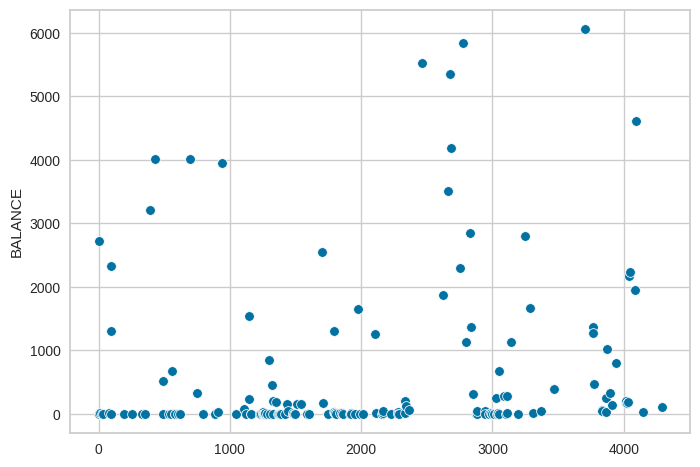

In [584]:
cek = sns.scatterplot(missing_value['BALANCE'])
plt.show()

Saat di cek korelasinya, minimum payment memiliki korelasi tinggi dengan feature balance. Dan menurut pendapat pribadi, ini termasuk missing value missing at random karena data yang hilang berkaitan dengan data feature balance, maka akan digunakan imputasi sederhana median kedalam missing value

In [626]:
median_values= data['MINIMUM_PAYMENTS'].median()
data['MINIMUM_PAYMENTS'].fillna(median_values, inplace=True)

In [628]:
data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [629]:
data.shape

(4474, 17)

## Handle Outlier

In [587]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

BALANCE                              2.456392
BALANCE_FREQUENCY                   -2.022132
PURCHASES                            8.986385
ONEOFF_PURCHASES                    10.139123
INSTALLMENTS_PURCHASES               8.116246
CASH_ADVANCE                         4.739128
PURCHASES_FREQUENCY                  0.061211
ONEOFF_PURCHASES_FREQUENCY           1.523135
PURCHASES_INSTALLMENTS_FREQUENCY     0.509932
CASH_ADVANCE_FREQUENCY               1.823301
CASH_ADVANCE_TRX                     4.752213
PURCHASES_TRX                        4.480139
CREDIT_LIMIT                         1.545078
PAYMENTS                             6.040435
MINIMUM_PAYMENTS                    12.568643
PRC_FULL_PAYMENT                     1.911294
TENURE                              -2.936380
dtype: float64


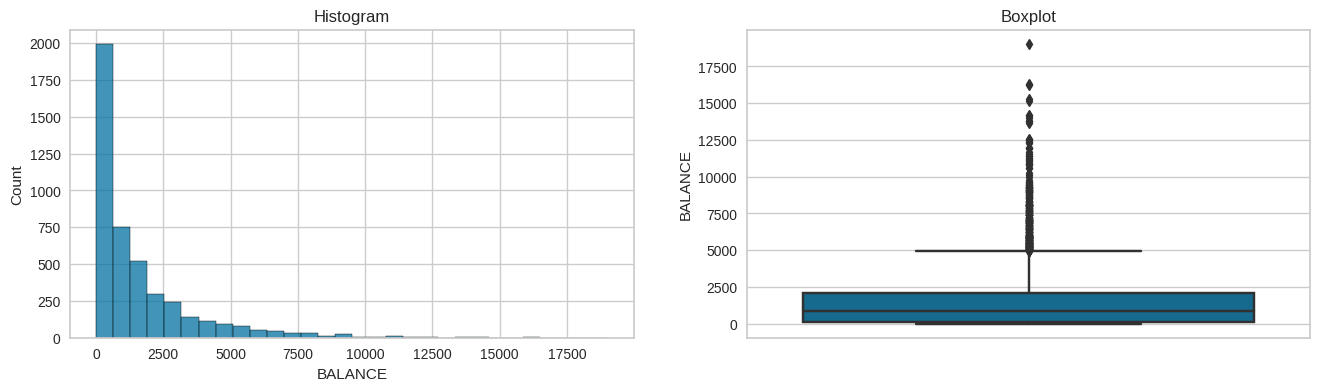

BALANCE : None


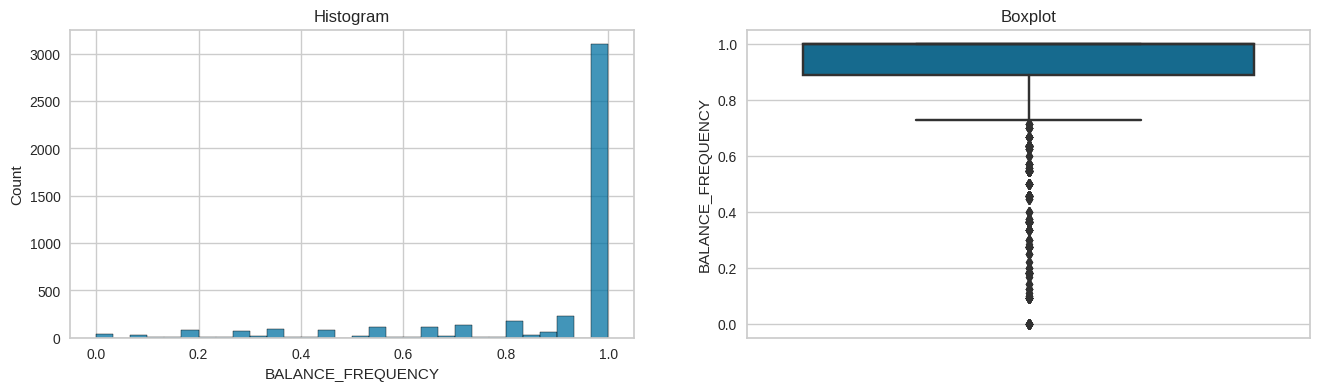

BALANCE_FREQUENCY : None


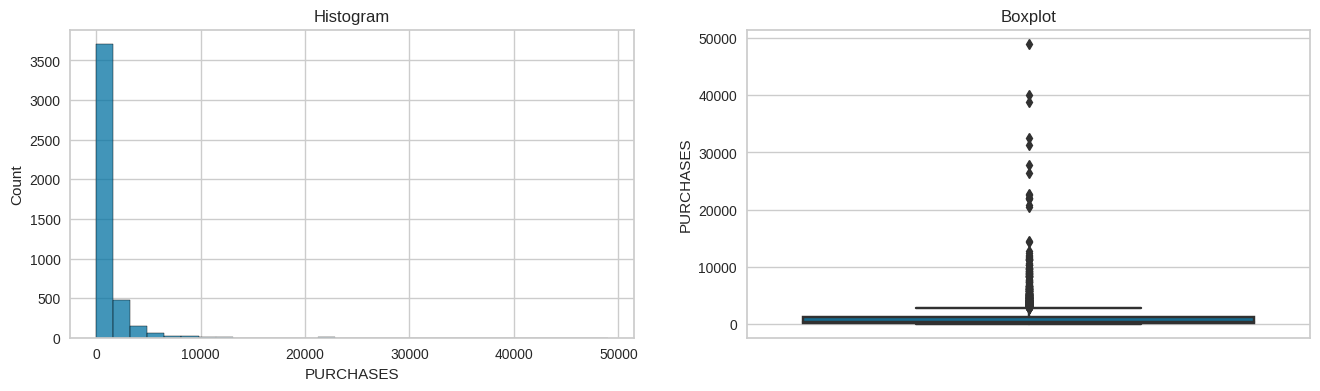

PURCHASES : None


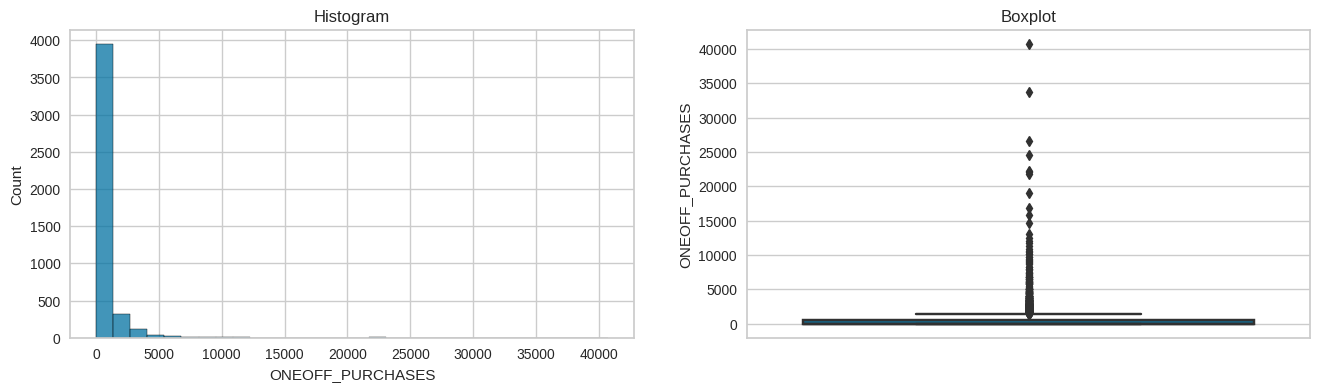

ONEOFF_PURCHASES : None


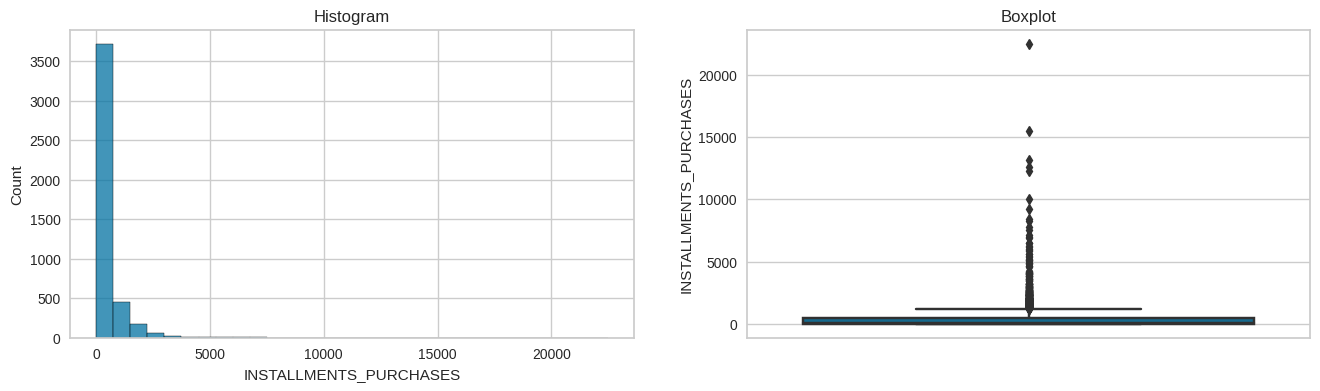

INSTALLMENTS_PURCHASES : None


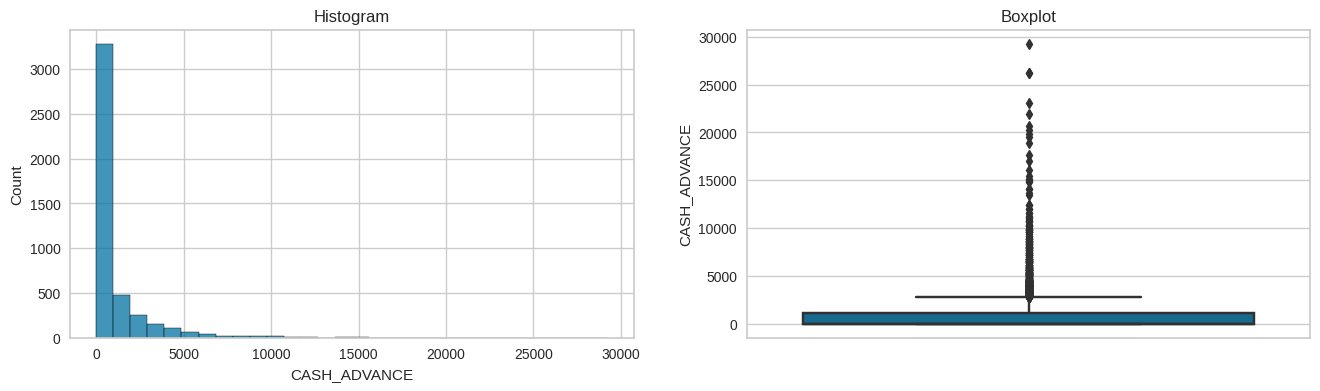

CASH_ADVANCE : None


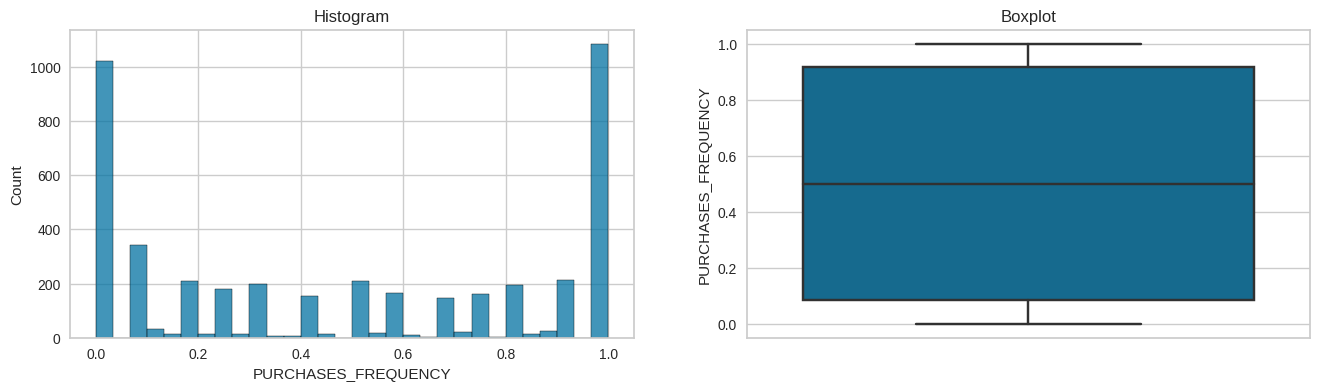

PURCHASES_FREQUENCY : None


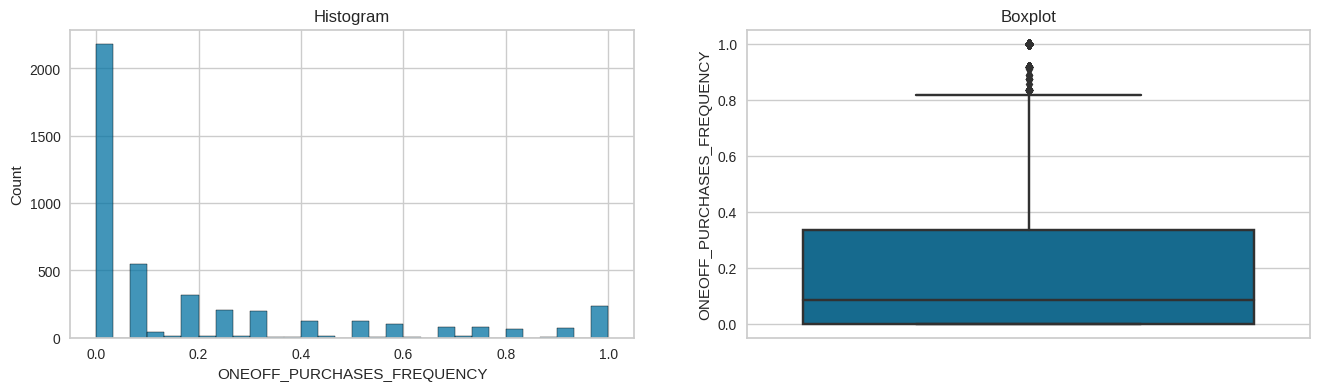

ONEOFF_PURCHASES_FREQUENCY : None


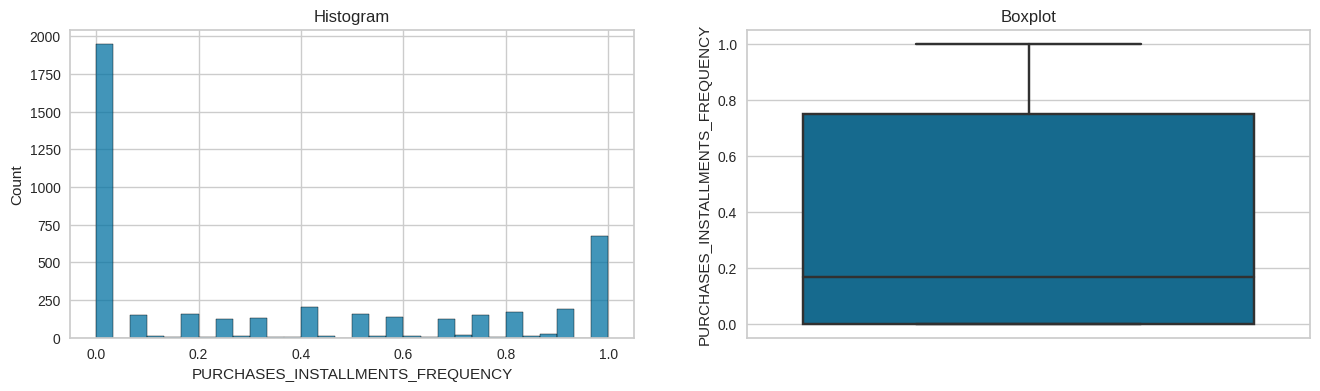

PURCHASES_INSTALLMENTS_FREQUENCY : None


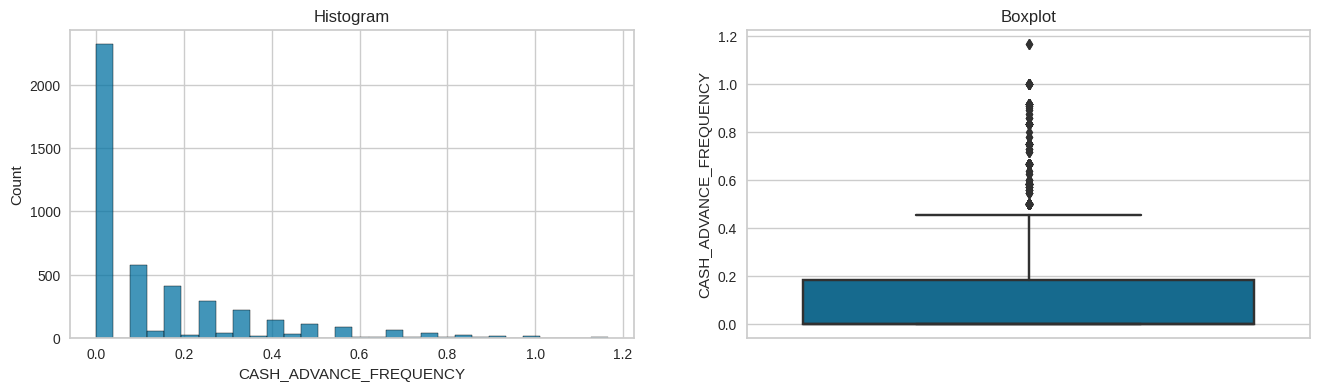

CASH_ADVANCE_FREQUENCY : None


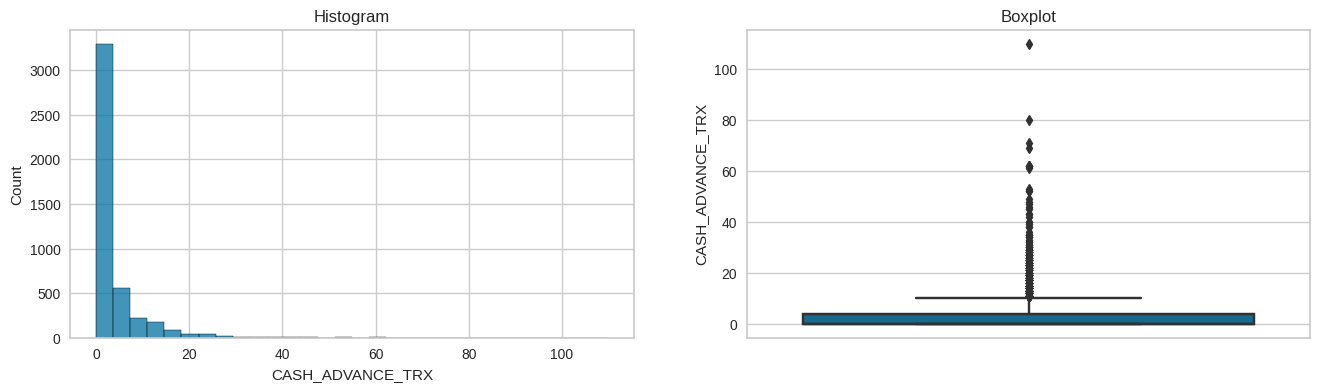

CASH_ADVANCE_TRX : None


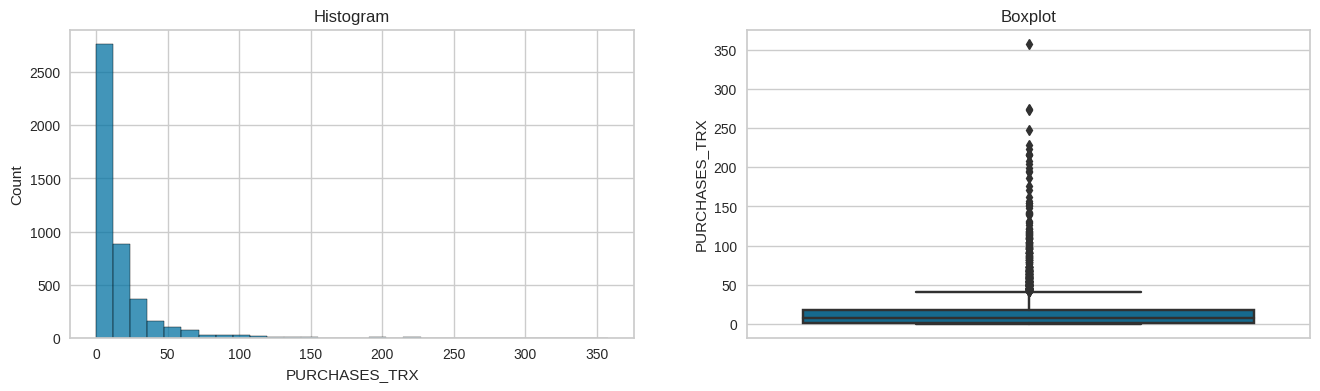

PURCHASES_TRX : None


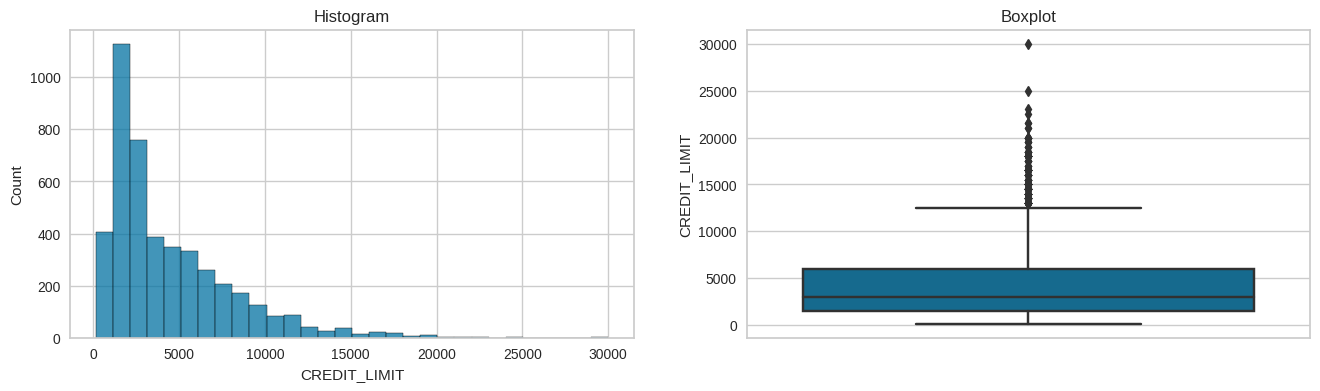

CREDIT_LIMIT : None


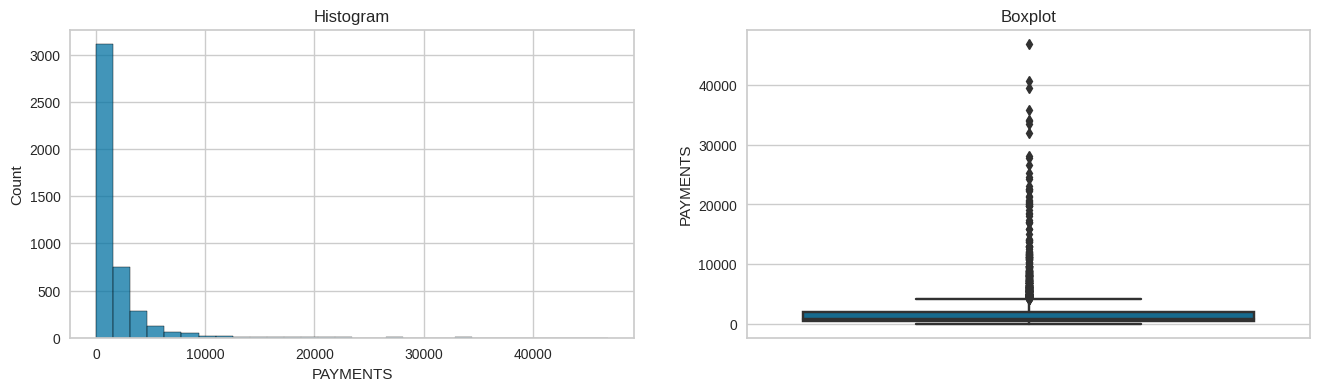

PAYMENTS : None


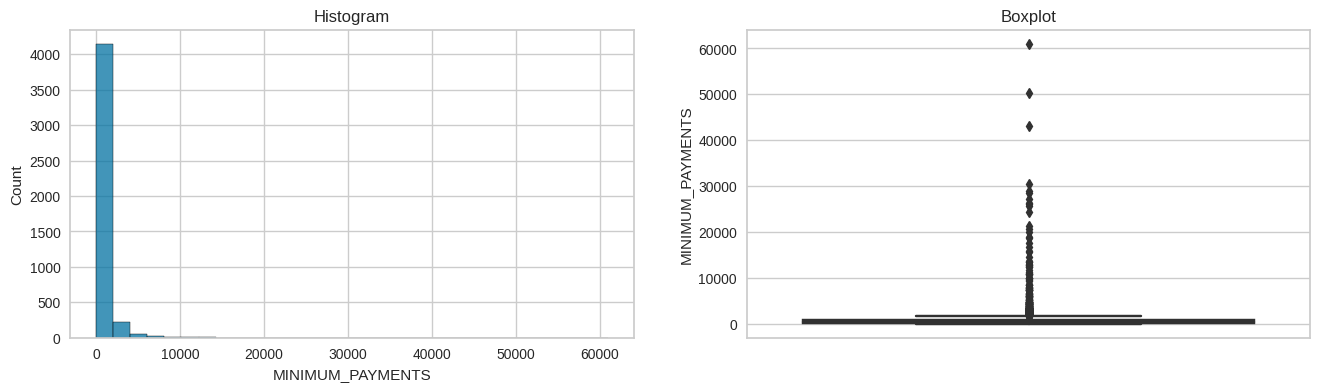

MINIMUM_PAYMENTS : None


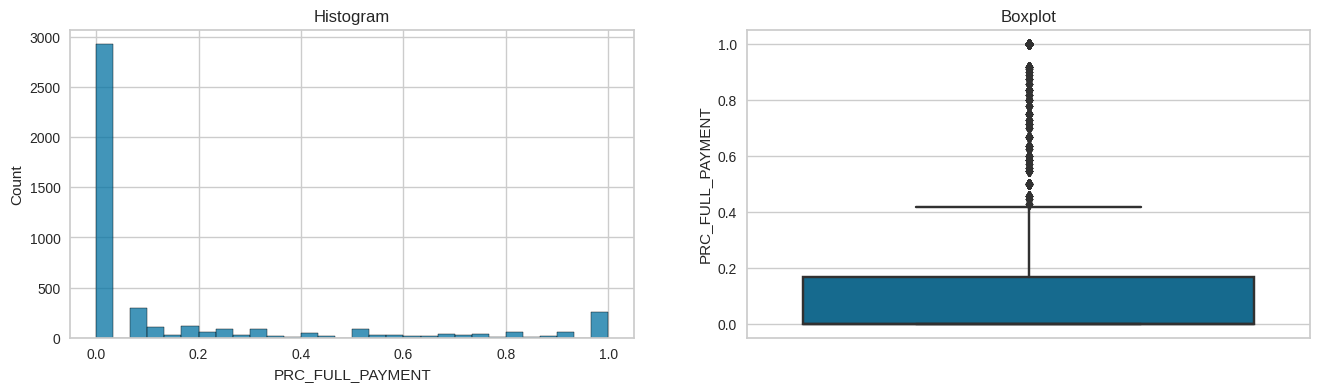

PRC_FULL_PAYMENT : None


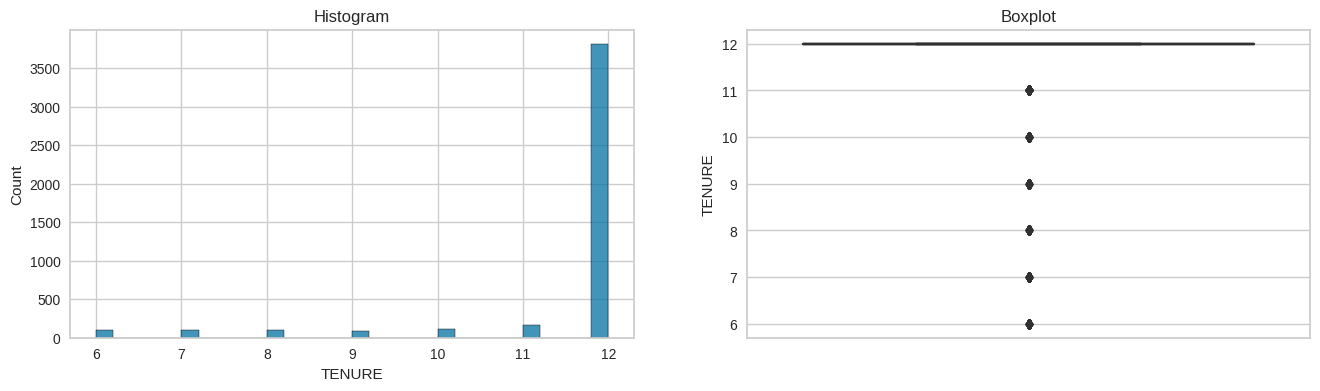

TENURE : None


In [630]:
print(data.skew())

for column in data:
  print(column, ":", diagnostic_plots(data,column))

PURCHASES_INSTALLMENTS_FREQUENCY merupakan feature yang terdistribusi secara normal. Feature lainnya akan di handle outlier

In [589]:
# Membuat fungsi untuk mencari batas atas dan batas bawah
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [590]:
for column in ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']:
  print("Upper dan lower boundary dari kolom",column, ":", find_skewed_boundaries(data, column , 1.5))

Upper dan lower boundary dari kolom BALANCE : (4952.286376374999, -2758.8977726249996)
Upper dan lower boundary dari kolom BALANCE_FREQUENCY : (1.1666664999999998, 0.7222225000000001)
Upper dan lower boundary dari kolom PURCHASES : (2747.0275, -1583.6325)
Upper dan lower boundary dari kolom ONEOFF_PURCHASES : (1450.9500000000003, -870.5700000000002)
Upper dan lower boundary dari kolom INSTALLMENTS_PURCHASES : (1210.90625, -726.54375)
Upper dan lower boundary dari kolom CASH_ADVANCE : (2747.51463375, -1648.5087802500002)
Upper dan lower boundary dari kolom PURCHASES_FREQUENCY : (2.166668, -1.166668)
Upper dan lower boundary dari kolom ONEOFF_PURCHASES_FREQUENCY : (0.8333325, -0.4999995)
Upper dan lower boundary dari kolom CASH_ADVANCE_FREQUENCY : (0.454545, -0.272727)
Upper dan lower boundary dari kolom CASH_ADVANCE_TRX : (10.0, -6.0)
Upper dan lower boundary dari kolom PURCHASES_TRX : (41.0, -23.0)
Upper dan lower boundary dari kolom CREDIT_LIMIT : (12750.0, -5250.0)
Upper dan lower bo

In [591]:
for column in  ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']:
    upper_boundary, lower_boundary = find_skewed_boundaries(data, column, 1.5)
    outliers = data[data[column] > upper_boundary]
    print('Total data outliers in {}: {}'.format(column, len(outliers)))


Total data outliers in BALANCE: 338
Total data outliers in BALANCE_FREQUENCY: 0
Total data outliers in PURCHASES: 383
Total data outliers in ONEOFF_PURCHASES: 487
Total data outliers in INSTALLMENTS_PURCHASES: 411
Total data outliers in CASH_ADVANCE: 515
Total data outliers in PURCHASES_FREQUENCY: 0
Total data outliers in ONEOFF_PURCHASES_FREQUENCY: 379
Total data outliers in CASH_ADVANCE_FREQUENCY: 372
Total data outliers in CASH_ADVANCE_TRX: 402
Total data outliers in PURCHASES_TRX: 366
Total data outliers in CREDIT_LIMIT: 162
Total data outliers in PAYMENTS: 395
Total data outliers in MINIMUM_PAYMENTS: 428
Total data outliers in PRC_FULL_PAYMENT: 685
Total data outliers in TENURE: 0


feature TENURE, BALANCE_FREQUENCY, PURCHASES_FREQUENCY tidak memiliki data outlier, asumsi saya karena value dari feature tersebut bisa disebut kategori karena memiliki unique value yang sedikit.

## Cencoring

In [631]:
# Create the capper

windsoriser = Winsorizer(capping_method='iqr',
                          tail='both',
                          fold=1.5,
                          variables=['BALANCE', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
    'ONEOFF_PURCHASES_FREQUENCY', 'MINIMUM_PAYMENTS',
       'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS',
       'PRC_FULL_PAYMENT'])

windsoriser.fit(data)

data_after = windsoriser.transform(data)

In [632]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'BALANCE': -2758.8977726249996, 'PURCHASES': -1583.6325, 'ONEOFF_PURCHASES': -870.5700000000002, 'INSTALLMENTS_PURCHASES': -726.54375, 'CASH_ADVANCE': -1648.5087802500002, 'ONEOFF_PURCHASES_FREQUENCY': -0.4999995, 'MINIMUM_PAYMENTS': -759.7145028749999, 'CASH_ADVANCE_FREQUENCY': -0.272727, 'CREDIT_LIMIT': -5250.0, 'CASH_ADVANCE_TRX': -6.0, 'PURCHASES_TRX': -23.0, 'PAYMENTS': -1867.773208375, 'PRC_FULL_PAYMENT': -0.2500005}
Right Tail Caps :  {'BALANCE': 4952.286376374999, 'PURCHASES': 2747.0275, 'ONEOFF_PURCHASES': 1450.9500000000003, 'INSTALLMENTS_PURCHASES': 1210.90625, 'CASH_ADVANCE': 2747.51463375, 'ONEOFF_PURCHASES_FREQUENCY': 0.8333325, 'MINIMUM_PAYMENTS': 1722.583078125, 'CASH_ADVANCE_FREQUENCY': 0.454545, 'CREDIT_LIMIT': 12750.0, 'CASH_ADVANCE_TRX': 10.0, 'PURCHASES_TRX': 41.0, 'PAYMENTS': 4155.168070625, 'PRC_FULL_PAYMENT': 0.4166675}


In [633]:
print('Data - Before Capping')
print(data[['BALANCE', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'ONEOFF_PURCHASES_FREQUENCY', 'MINIMUM_PAYMENTS',
       'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS',
       'PRC_FULL_PAYMENT']].describe())
print('')

Data - Before Capping
            BALANCE     PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
count   4474.000000   4474.000000       4474.000000             4474.000000   
mean    1566.089791   1003.382544        588.636388              415.117839   
std     2091.311473   2211.009126       1666.663328              927.443733   
min        0.000000      0.000000          0.000000                0.000000   
25%      132.796283     40.365000          0.000000                0.000000   
50%      875.322114    362.830000         29.995000               89.515000   
75%     2060.592320   1123.030000        580.380000              484.362500   
max    19043.138560  49039.570000      40761.250000            22500.000000   

       CASH_ADVANCE  ONEOFF_PURCHASES_FREQUENCY  MINIMUM_PAYMENTS  \
count   4474.000000                 4474.000000       4474.000000   
mean     973.629487                    0.202659        835.390086   
std     2133.670549                    0.298520       2267.

In [634]:
print('Data - After Capping')
print(data_after[['BALANCE', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'ONEOFF_PURCHASES_FREQUENCY', 'MINIMUM_PAYMENTS',
       'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS',
       'PRC_FULL_PAYMENT']].describe())


Data - After Capping
           BALANCE    PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
count  4474.000000  4474.000000       4474.000000             4474.000000   
mean   1389.984203   741.663259        355.462881              302.652465   
std    1531.626878   882.581607        513.642068              407.545121   
min       0.000000     0.000000          0.000000                0.000000   
25%     132.796283    40.365000          0.000000                0.000000   
50%     875.322114   362.830000         29.995000               89.515000   
75%    2060.592320  1123.030000        580.380000              484.362500   
max    4952.286376  2747.027500       1450.950000             1210.906250   

       CASH_ADVANCE  ONEOFF_PURCHASES_FREQUENCY  MINIMUM_PAYMENTS  \
count   4474.000000                 4474.000000       4474.000000   
mean     653.991712                    0.192312        554.418305   
std      979.987750                    0.272673        527.449166   
min      

In [635]:
data_after.shape

(4474, 17)

## Feature Scaling

Menggunakan methode minmaxscaler pada feature yang tidak terdistribusi secara normal

In [596]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [636]:
# Feature Scaling using MinMaxScaler

scaling = data_after[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX','CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']]

scaler = MinMaxScaler()
scaler.fit(scaling)
data_scaling = scaler.transform(scaling)


In [637]:
concat = data_after[['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY' ]]
concat_array = concat.to_numpy()
concat_array

array([[0.125   , 0.125   , 0.      , 0.125   , 0.      ],
       [0.875   , 0.125   , 0.125   , 0.      , 0.      ],
       [0.125   , 0.125   , 0.125   , 0.      , 0.      ],
       ...,
       [1.      , 1.      , 0.727273, 0.363636, 0.454545],
       [1.      , 0.454545, 0.454545, 0.      , 0.454545],
       [1.      , 0.909091, 0.090909, 0.818182, 0.454545]])

In [638]:
data_final = np.hstack((data_scaling, concat_array))
data_final.shape

(4474, 17)

## Feature Encoding

Data kategori yang tersedia sudah berupa angka (numerikal), jadi tidak perlu dilakukan feture encoding

# Modeling Section

## PCA

In [640]:
pca = PCA(n_components=2, random_state=29)
X_pca = pca.fit_transform(data_final)
pca.explained_variance_ratio_

array([0.36683557, 0.21598897])

In [641]:
X_pca.shape

(4474, 2)

In [642]:
#rename column
df_pca = pd.DataFrame(X_pca)

columns = []
for i in df_pca.columns:
    num = i + 1
    value = "PC" + str(num)
    columns.append(value)
df_pca.columns = columns

df_pca

,PC1,PC2
0,-0.604584,-0.742887
1,-0.650425,-0.496708
2,-0.692145,-0.727006
3,-0.480802,-0.478611
4,-0.209415,-0.219245
...,...,...
4469,-0.963823,0.129953
4470,-0.928369,0.489215
4471,0.071222,0.992396
4472,-0.142300,1.517440


##Elbow Method

Elbow Method


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

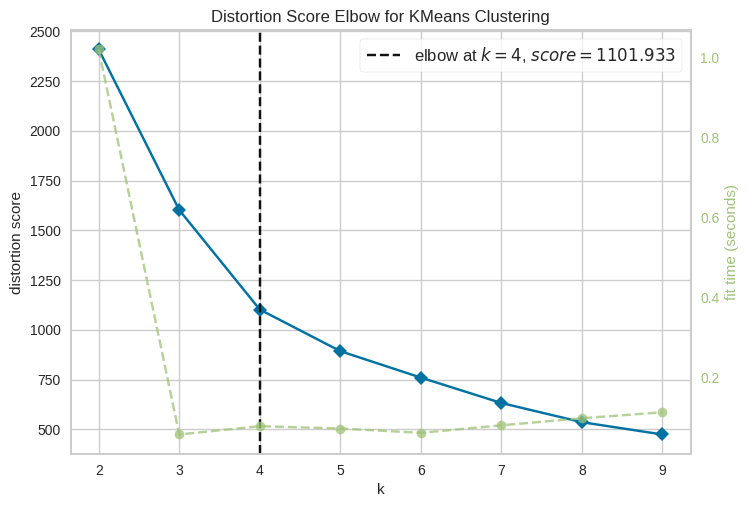

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [643]:
print('Elbow Method')
Elbow_M = KElbowVisualizer(KMeans(), k=9)
Elbow_M.fit(X_pca)
Elbow_M.show()

## Model definition

In [644]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 200, random_state = 29)
km.fit(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=200, n_clusters=4, random_state=29)

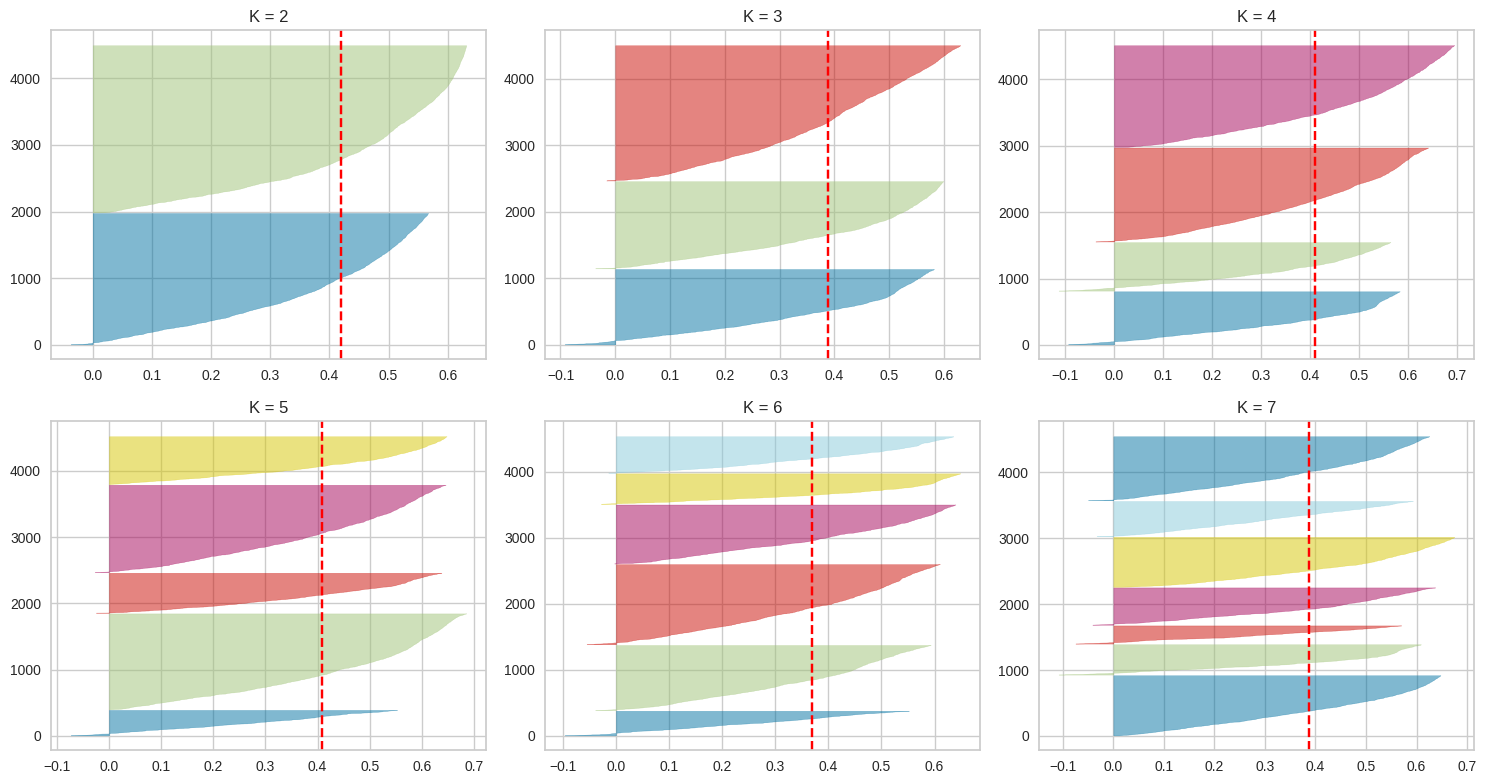

In [645]:
# Set up subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Loop melalui setiap subplot
for i, ax in enumerate(axes.flatten()):
    # Set jumlah cluster
    n_clusters = i + 2

    # Initialize K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init = 10, max_iter = 100, random_state = 42)

    # Buat SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer ke data x
    visualizer.fit(X_pca)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

In [646]:
clusters = km.labels_

# Get cluster centers
#cluster_centers = km.cluster_centers_
#print("Cluster Labels:")
#print(clusters)
#print("Cluster Centers:")
#print(cluster_centers)

In [647]:
reduced_data = pd.DataFrame(X_pca)

# Print the head of the reduced_data DataFrame
print(reduced_data.head())

          0         1
0 -0.604584 -0.742887
1 -0.650425 -0.496708
2 -0.692145 -0.727006
3 -0.480802 -0.478611
4 -0.209415 -0.219245


In [648]:
reduced_data['clusters']= clusters
reduced_data.head()

,0,1,clusters
0,-0.604584,-0.742887,2
1,-0.650425,-0.496708,2
2,-0.692145,-0.727006,2
3,-0.480802,-0.478611,2
4,-0.209415,-0.219245,2


In [657]:
reduced_data.shape

(4474, 3)

In [658]:
reduced_data.columns = reduced_data.columns.astype(str)
reduced_data.rename(columns={'0': 'PC1', '1': 'PC2'}, inplace=True)
reduced_data

,PC1,PC2,clusters
0,-0.604584,-0.742887,2
1,-0.650425,-0.496708,2
2,-0.692145,-0.727006,2
3,-0.480802,-0.478611,2
4,-0.209415,-0.219245,2
...,...,...,...
4469,-0.963823,0.129953,2
4470,-0.928369,0.489215,0
4471,0.071222,0.992396,0
4472,-0.142300,1.517440,0


In [650]:
reduced_data.iloc[3843]


PC1        -0.792252
PC2        -0.175803
clusters    2.000000
Name: 3843, dtype: float64

In [660]:
df = pd.DataFrame(data_final)

In [661]:
pca_df_cluster = pd.concat([df, reduced_data], axis=1)
pca_df_cluster.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,PC1,PC2,clusters
0,0.003348,0.072806,0.000000,0.165166,0.0,0.0,0.04878,0.083333,0.000000,0.179935,0.0,0.333333,0.125,0.125,0.000,0.125,0.0,-0.604584,-0.742887,2
1,0.190535,0.037495,0.070988,0.000000,0.0,0.0,0.02439,0.067460,0.051821,0.238279,0.0,0.333333,0.875,0.125,0.125,0.000,0.0,-0.650425,-0.496708,2
2,0.000400,0.029122,0.055136,0.000000,0.0,0.0,0.02439,0.107143,0.000000,0.179935,0.0,0.333333,0.125,0.125,0.125,0.000,0.0,-0.692145,-0.727006,2
3,0.093180,0.212957,0.403184,0.000000,0.0,0.0,0.02439,0.067460,0.062099,0.088043,0.0,0.333333,1.000,0.125,0.125,0.000,0.0,-0.480802,-0.478611,2
4,0.212749,0.527843,0.999345,0.000000,0.0,0.0,0.02439,0.107143,0.095565,0.131843,0.0,0.333333,1.000,0.125,0.125,0.000,0.0,-0.209415,-0.219245,2


In [662]:
pca_df_cluster.shape

(4474, 20)

<Axes: xlabel='PC1', ylabel='PC2'>

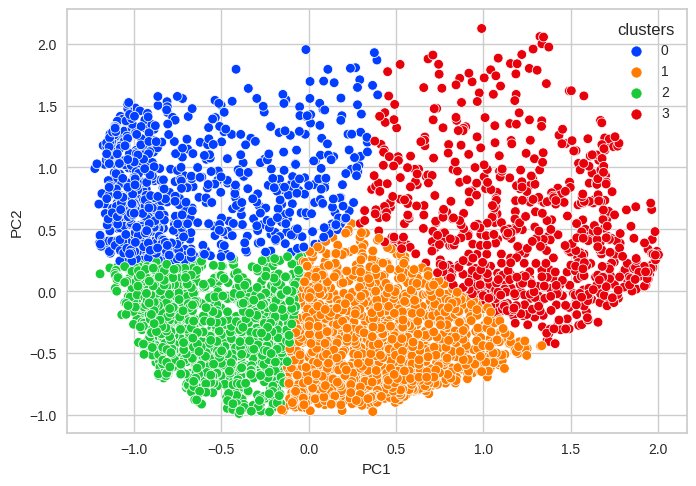

In [665]:
sns.scatterplot(data=pca_df_cluster, x="PC1", y="PC2", hue="clusters",palette="bright")

In [666]:
cluster1 = pca_df_cluster[pca_df_cluster['clusters'] == 1]
cluster0 = pca_df_cluster[pca_df_cluster['clusters'] == 0]
cluster2 = pca_df_cluster[pca_df_cluster['clusters'] == 2]
cluster3 = pca_df_cluster[pca_df_cluster['clusters'] == 3]

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


<Figure size 2000x500 with 0 Axes>

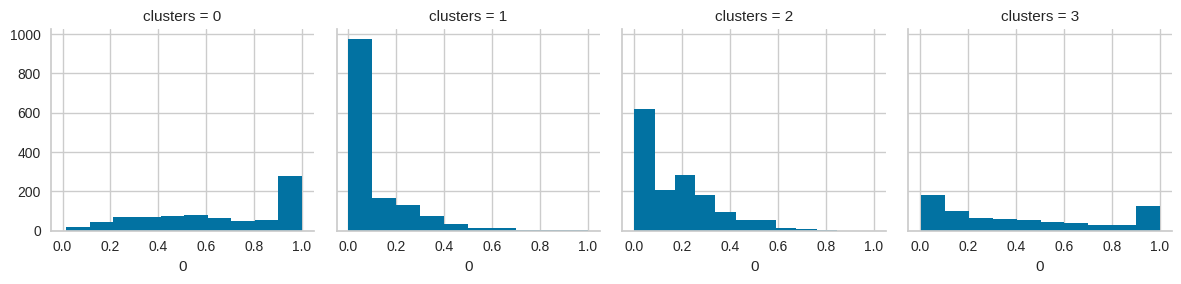

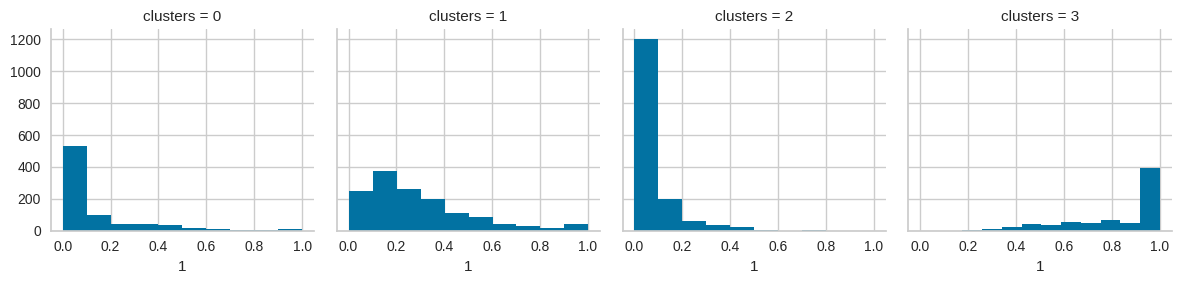

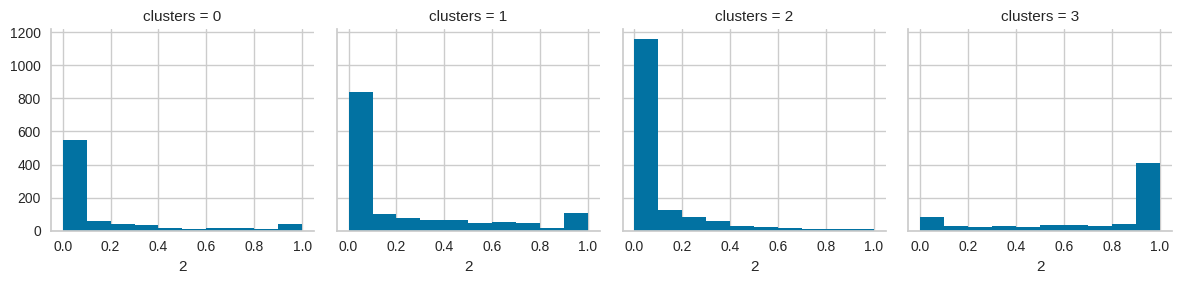

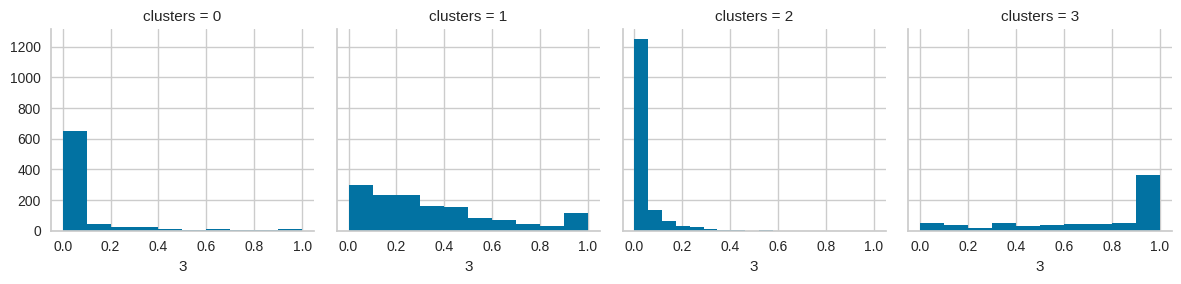

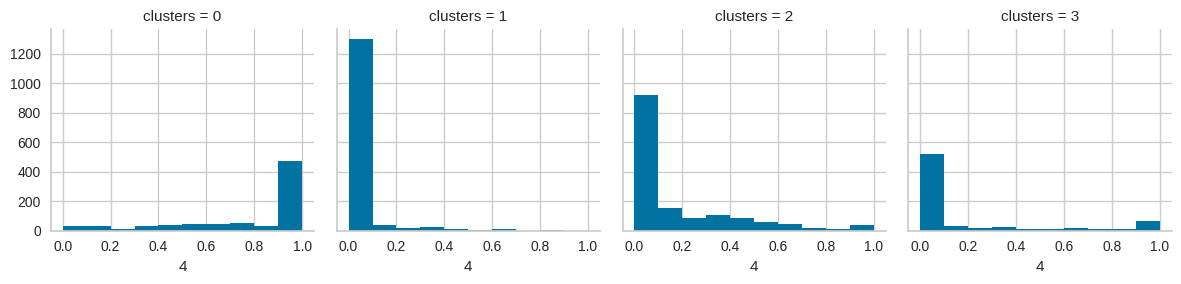

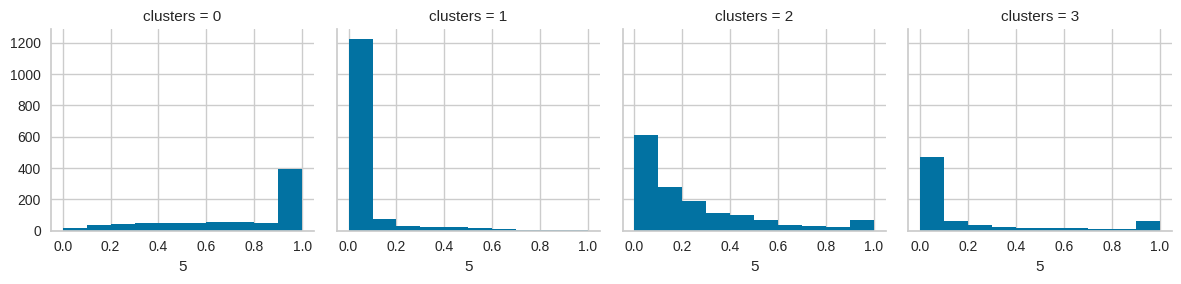

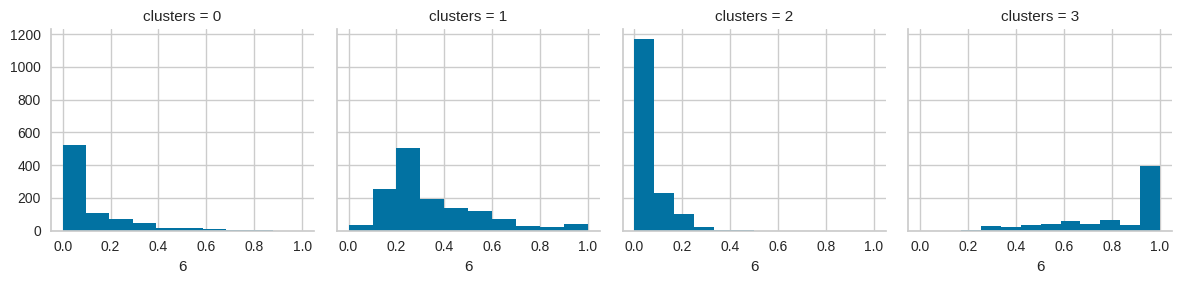

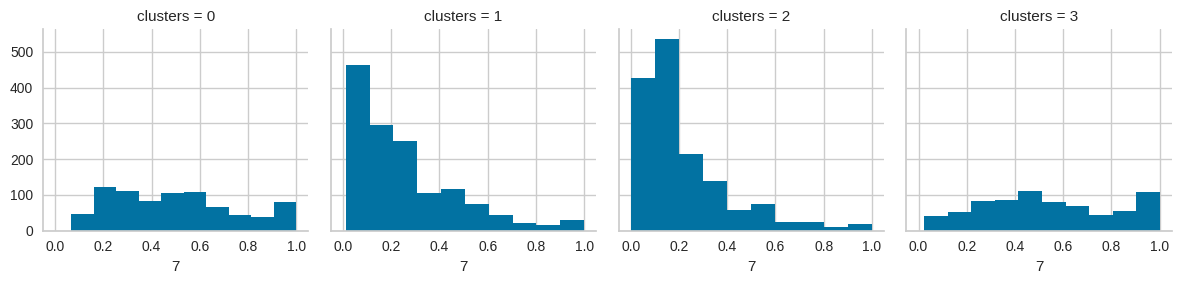

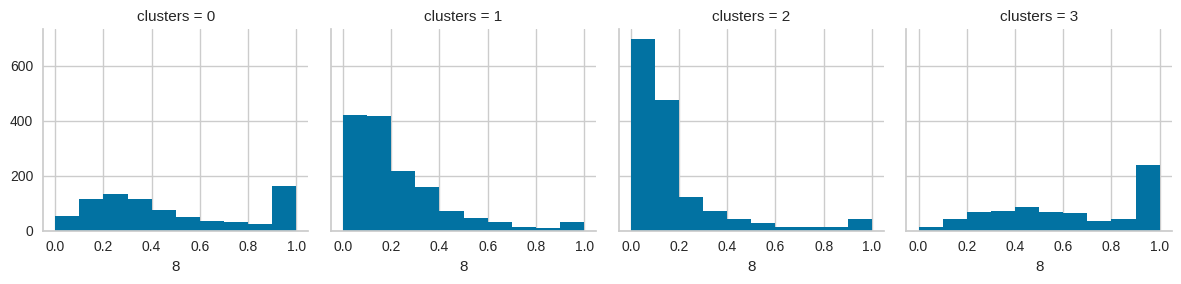

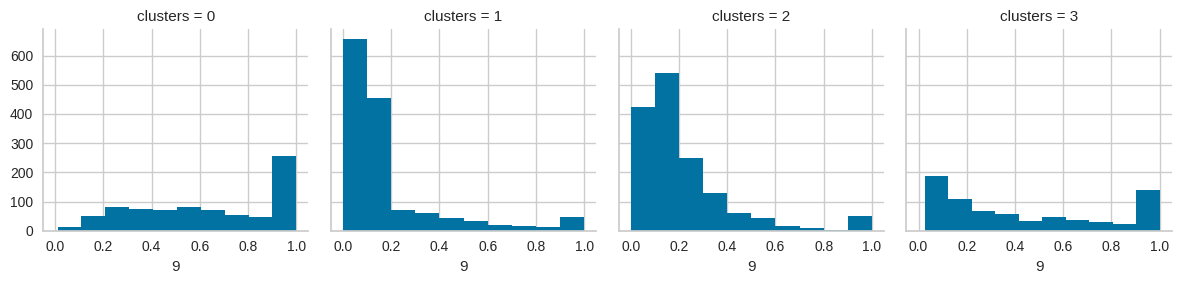

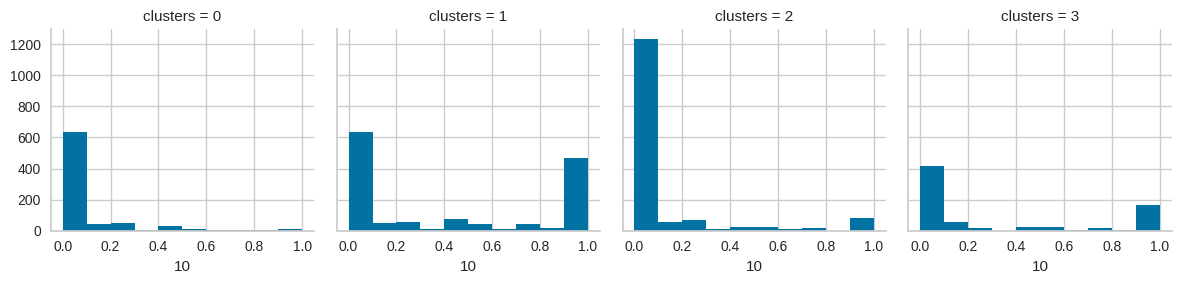

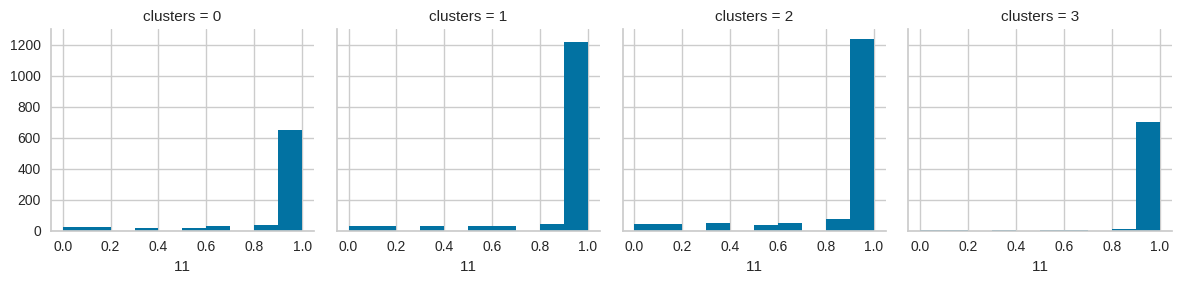

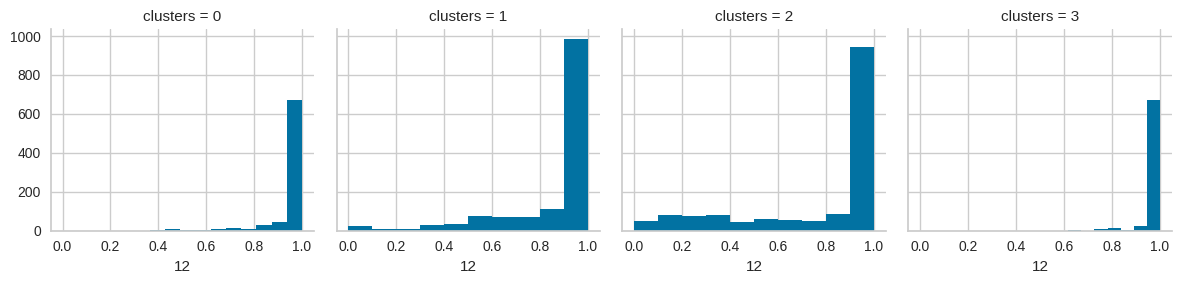

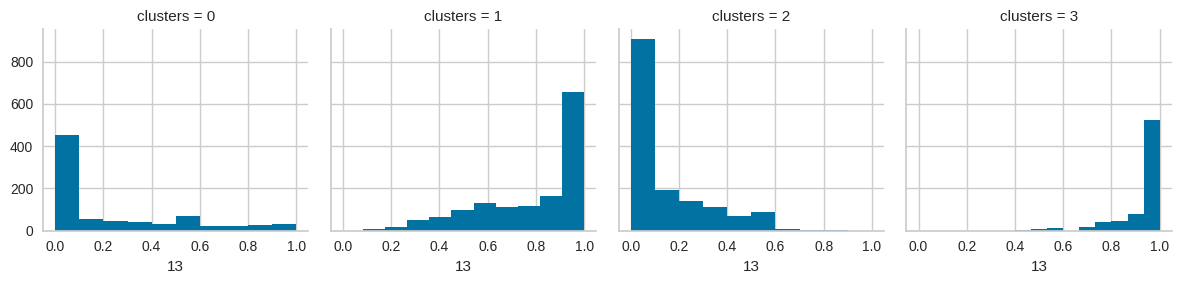

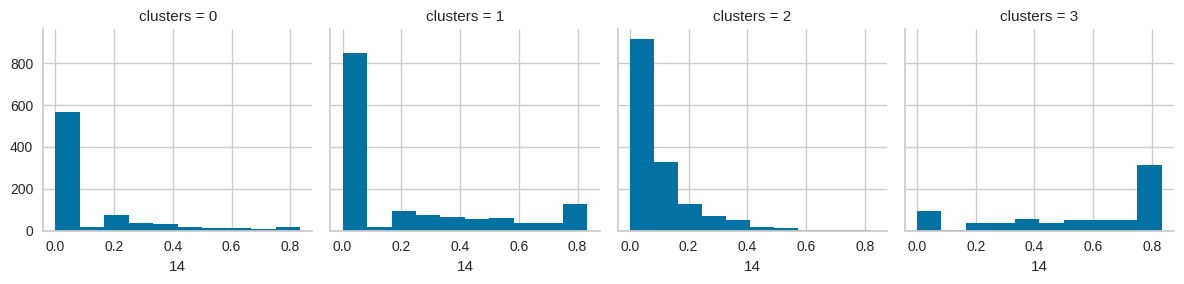

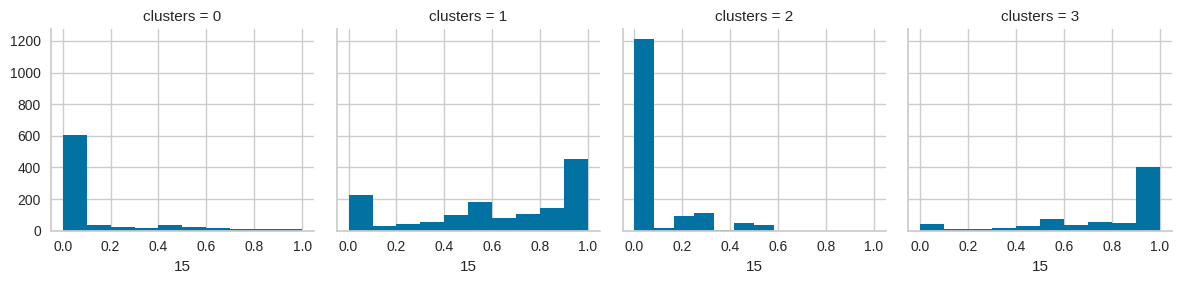

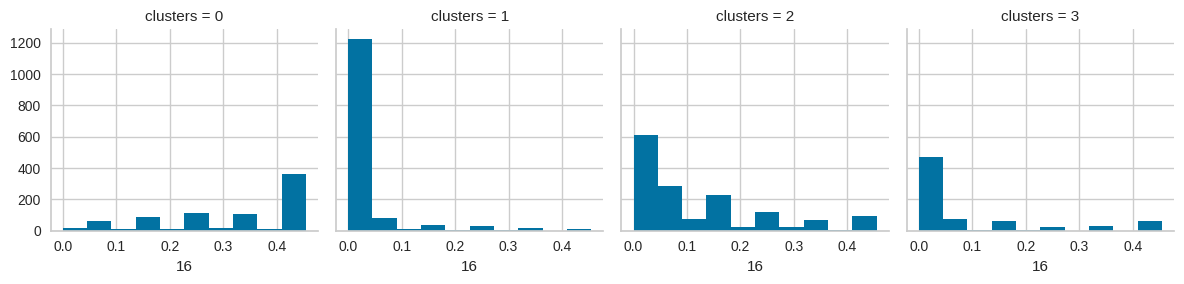

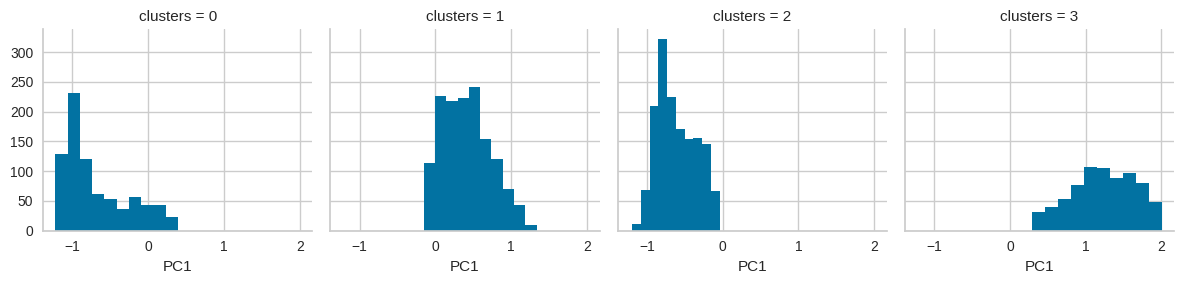

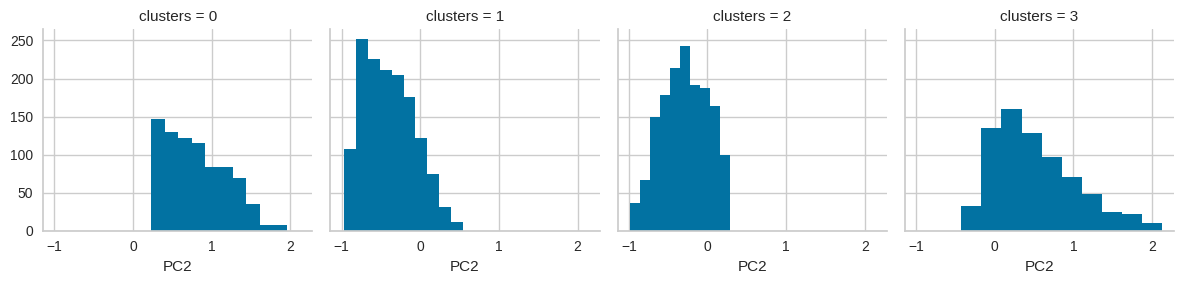

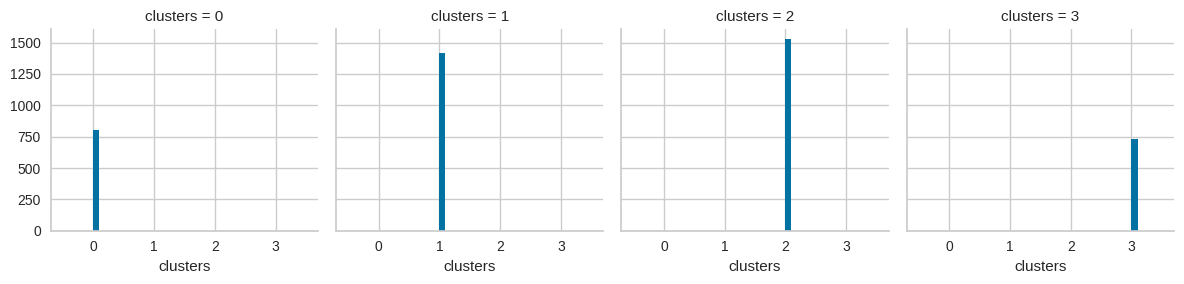

In [667]:
plt.figure(figsize=(20,5))
for c in pca_df_cluster:
    grid= sns.FacetGrid(pca_df_cluster, col='clusters')
    grid.map(plt.hist, c)

In [668]:
for column in cluster0:
  print(column, "Mean:", cluster0[column].mean())

0 Mean: 0.6683473426747681
1 Mean: 0.12215196698977347
2 Mean: 0.15009381784348183
3 Mean: 0.07351294097912203
4 Mean: 0.7930348300680139
5 Mean: 0.715375
6 Mean: 0.09871951219512196
7 Mean: 0.498561507936508
8 Mean: 0.48204604748209745
9 Mean: 0.6443894047963639
10 Mean: 0.0763279668440663
11 Mean: 0.9014583333333335
12 Mean: 0.9615189925
13 Mean: 0.21667521
14 Mean: 0.10644873125
15 Mean: 0.1123927775
16 Mean: 0.32259024374999995
PC1 Mean: -0.684727301308978
PC2 Mean: 0.8020188841806017
clusters Mean: 0.0


In [669]:
for column in cluster1:
  print(column, "Mean:", cluster1[column].mean())

0 Mean: 0.10297614165197948
1 Mean: 0.2897455919291556
2 Mean: 0.21418253628539136
3 Mean: 0.34390897915220175
4 Mean: 0.028935975653923304
5 Mean: 0.04064925899788286
6 Mean: 0.35695474809370537
7 Mean: 0.266274290892003
8 Mean: 0.22464386920335114
9 Mean: 0.18744019283327543
10 Mean: 0.43076869132076834
11 Mean: 0.9202540578687368
12 Mean: 0.8725105123500354
13 Mean: 0.7913367812279464
14 Mean: 0.19165256739590683
15 Mean: 0.6174608955539873
16 Mean: 0.02322242625264644
PC1 Mean: 0.41418608584459526
PC2 Mean: -0.3984696677826012
clusters Mean: 1.0


In [670]:
for column in cluster2:
  print(column, "Mean:", cluster2[column].mean())

0 Mean: 0.17274227407028106
1 Mean: 0.060571999372133034
2 Mean: 0.08922507661755899
3 Mean: 0.029410221957921034
4 Mean: 0.17051071339154236
5 Mean: 0.19941137998691957
6 Mean: 0.05189108136993731
7 Mean: 0.215007215007215
8 Mean: 0.17541734926300243
9 Mean: 0.22105514412634567
10 Mean: 0.10491396231072807
11 Mean: 0.8977545236538041
12 Mean: 0.7866308495748855
13 Mean: 0.13807219686069325
14 Mean: 0.06782526945716155
15 Mean: 0.06647361478090255
16 Mean: 0.11449748332243297
PC1 Mean: -0.6097656026431215
PC2 Mean: -0.2898737404246157
clusters Mean: 2.0


In [671]:
for column in cluster3:
  print(column, "Mean:", cluster3[column].mean())

0 Mean: 0.42722946689773483
1 Mean: 0.8338168833962696
2 Mean: 0.7363624779369636
3 Mean: 0.7240777783985352
4 Mean: 0.17693201523964186
5 Mean: 0.17500000000000002
6 Mean: 0.8211270436880193
7 Mean: 0.5445700133200332
8 Mean: 0.6381500334977863
9 Mean: 0.44065338127283055
10 Mean: 0.3089924226744952
11 Mean: 0.9842032967032966
12 Mean: 0.9873741923076924
13 Mean: 0.9443946112637362
14 Mean: 0.5494059429945054
15 Mean: 0.778612771978022
16 Mean: 0.08545875412087911
PC1 Mean: 1.2269392360531919
PC2 Mean: 0.5030678035888763
clusters Mean: 3.0


Cluster 0: <br>
 Rata-rata limit saldo mereka adalah `$6140.25` dan rata-rata tagihan sebesar `$3647.90`, dengan frekuensi membayar tagihan yang sangat rutin, yaitu 0.95. Mereka rata-rata menggunakan kartu kredit untuk melakukan pembelian sebesar `$408.24`, dan jumlah pembayaran minimum yang mereka lakukan rata-rata sebesar `$1525.70`. Klien dalam cluster 1 cenderung jarang menggunakan kartu kredit untuk pembayaran, dengan frekuensi sebesar 0.21. Jenis pembayaran yang biasa mereka lakukan adalah cash advance atau tarik tunai, dengan frekuensi sebesar 0.38.

- Kesimpulannya, klien dalam cluster 0 jarang menggunakan kartu kredit, tetapi rutin dalam membayar tagihan walaupun dengan rata-rata saldo tertinggi di antara kluster lainnya dan rata-rata payment yang dilakukan dalam 6 bulan terakhir juga sudah melebihi rata-rata tagihan. Pembayaran yang biasa dilakukan menggunakan kartu kredit adalah tarik tunai. <br>

Cluster 1: <br>
Ini adalah Klien yang memiliki rata-rata saldo limit sebesar `$3635.29` dan memiliki tagihan rata-rata `$553.67`, dengan frekuensi membayar tagihan yang sangat rutin, yaitu sebanyak 0.87. Mereka umumnya menggunakan kartu kredit untuk melakukan pembelian dengan rata-rata sebesar `$827.81`, dan jumlah pembayaran minimum yang mereka lakukan rata-rata sebesar `$463.59`. Pelanggan dalam cluster 1 cenderung sering menggunakan kartu kredit untuk melakukan pembayaran dengan frekuensi sebesar 0.78 dan mereka sering melakukan pembayaran dalam bentuk cicilan dengan frekuensi sebesar 0.61. <br>

- Kesimpulannya, klien dalam cluster 1 sering menggunakan kartu kredit untuk pembayaran, terutama dalam bentuk pembayaran cicilan dan secara rutin membayar tagihan. <br>

Cluster 2: <br>
Ini adalah pelanggan yang memiliki rata-rata limit saldo sebesar `$3129.12` dan memiliki tagihan dengan rata-rata `$993.67`, namun ata-rata payment tidak menutupi tagihan. Mereka umumnya menggunakan kartu kredit untuk melakukan pembayaran dengan rata-rata sebesar `$187.05`, dan jumlah pembayaran minimum yang mereka lakukan rata-rata sebesar `$608.02`. Pelanggan dalam cluster 1 biasa melakukan pembelian dengan kartu kredit dengan frekuensi rendah yaitu 0.14.

- Kesimpulannya, klien dalam cluster 2 sangat jarang menggunakan kartu kredit tetapi sangat rutin dalam membayar tagihan, namun rata-rata payment tidak menutupi jumlah tagihan. Selain itu, jumlah pembayaran minimum yang hampir sebanding dengan saldo menunjukkan bahwa mereka cenderung melakukan pembayaran dalam jumlah besar dalam satu kali transaksi menggunakan kartu kredit.

Cluster 3: <br>
Ini adalah pelanggan yang memiliki rata-rata limit saldo sebesar `$7221.88` dan dan memiliki tagihan dengan rata-rata `$2449.84`. Mereka umumnya menggunakan kartu kredit untuk melakukan pembayaran dengan rata-rata sebesar `$3712.45`, dan jumlah pembayaran minimum yang mereka lakukan rata-rata sebesar `$1277.59`. Pelanggan dalam cluster 1 cenderung sangat sering menggunakan kartu kredit untuk melakukan pembayaran dengan frekuensi sebesar 0.93. Jenis pembayaran yang sering dilakukan oleh mereka adalah pembelian dengan frekuensi 0.93, one-off purchase dengan frekuensi 0.58, dan cicilan dengan frekuensi 0.77.

- Kesimpulannya, klien dalam cluster 3 adalah klien yang sangat sering menggunakan kartu kredit dengan limit tertinggi. Mereka juga rutin mengisi saldo kredit dan sering melakukan pembayaran dalam bentuk pembelian dan cicilan. Selain itu, pembayaran satu kali juga sering dilakukan oleh klien dalam cluster 3.

Saran:

Harus dilakukan analisa lebih lanjut pada kluster 2 karena rata-rata pembayaran tagihan yang dilakukan(payment) tidak menutupi atau kurang dari rata-rata tagihan yang ada.

# Model Evaluation

In [672]:
silhouette_avg = silhouette_score(pca_df_cluster, km.labels_)
print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.4110742706895142


Silhouette Coefficient mendekati 0 menunjukan bahwa sampel berada pada atau sangat dekat dengan decision boundary antar cluster. Ini menunjukkan cluster yang tumpang tindih.

# Model Saving

In [673]:
inf_sc = joblib.load("scale.pkl")
inf_pca = joblib.load("pca.pkl")
inf_km = joblib.load("kmeans.pkl")

# Model Inference

In [674]:
data_after.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [675]:
data_inf = {
    'BALANCE': 1000,
    'BALANCE_FREQUENCY':1,
    'PURCHASES': 500,
    'ONEOFF_PURCHASES': 103,
    'INSTALLMENTS_PURCHASES':100,
    'CASH_ADVANCE': 1000,
    'PURCHASES_FREQUENCY':1,
    'ONEOFF_PURCHASES_FREQUENCY': 0.4,
    'PURCHASES_INSTALLMENTS_FREQUENCY': 0.4,
    'CASH_ADVANCE_FREQUENCY': 0.5,
    'CASH_ADVANCE_TRX':5,
    'PURCHASES_TRX':5,
    'CREDIT_LIMIT': 5000,
    'PAYMENTS': 1000,
    'MINIMUM_PAYMENTS': 1000,
    'PRC_FULL_PAYMENT': 0,
    'TENURE': 1
}

data_inf = pd.DataFrame([data_inf])
data_inf

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1000,1,500,103,100,1000,1,0.4,0.4,0.5,5,5,5000,1000,1000,0,1


In [676]:
data_inf.shape

(1, 17)

In [682]:
data_inf_scaled = scaler.transform(data_inf[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
      'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']])

In [683]:
pca = inf_pca.transform(data_inf)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [684]:
pred = km.predict(pca)
print("Cluster:", pred)

Cluster: [3]


# Conceptual Problem

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ? <br>
Kmeans dapat diartikan dengan menghitung jarak dari setiap data ke setiap centroid dengan mencari minimum jarak ke setiap centroidnya. Dalam sklearn untuk menunjukan total jarak data dengan pusat (centroidnya) disebut inertia

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !
Dalam clustering sangat sulit untuk menentukan berapa jumlah cluster yang sesuai dengan data. Dengan bantuan metode elbow dapat membantu dalam menentukan cluster yang optimal dalam clustering. Di library yellowbrick.cluster kita dapat menggunakan KElbowVisualizer untuk mengidentifikasi titik "siku" pada grafik yang menunjukkan penurunan yang signifikan dalam inertia. Kelebihan dari metode ini adalah mudah dipahami namun kelemahan nya adalah bersifat objective dalam menentukan titik siku.
